In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
y=df['Survived']
x=df.copy()
x.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1, inplace=True)

In [4]:
print(y)
x

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [5]:
x.replace('male', 0, inplace=True)
x.replace('female', 1, inplace=True)
x.replace('S',1,inplace=True)
x.replace('C',2,inplace=True)
x.replace('Q',3,inplace=True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,2.0
2,3,1,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1.0
887,1,1,19.0,0,0,30.0000,1.0
888,3,1,NaN,1,2,23.4500,1.0
889,1,0,26.0,0,0,30.0000,2.0


In [6]:
for i in range(7):
    m=x.iloc[:,i].mean()
    x.iloc[:,i].replace(np.nan,m, inplace=True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,1.0
1,1,1,38.000000,1,0,71.2833,2.0
2,3,1,26.000000,0,0,7.9250,1.0
3,1,1,35.000000,1,0,53.1000,1.0
4,3,0,35.000000,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,1.0
887,1,1,19.000000,0,0,30.0000,1.0
888,3,1,29.699118,1,2,23.4500,1.0
889,1,0,26.000000,0,0,30.0000,2.0


In [7]:
columns=[]
for col in x:
    columns.append(col)
columns

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [8]:
for i in range(7):
    col=columns[i]
    mn=x[col].min()
    mx=x[col].max()
    x[col]=(x[col]-mn)/(mx-mn)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.0
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.5
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.0
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0
887,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0
888,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.0
889,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.5


In [9]:
w=[1]*7
b=0
pred=np.dot(x,w)
pred=pred+b
pred=1/(1+np.exp(-pred))
print(pred)
print('---')
loss=np.multiply(-y, np.log(pred))-np.multiply((1-y),np.log(pred))
print(loss)
loss=loss.sum()/891
print(loss)

[0.80381716 0.9034679  0.91188781 0.84066383 0.81003596 0.91563229
 0.68449647 0.83238935 0.93637846 0.91327859 0.91445213 0.85512431
 0.77932795 0.92443386 0.89898309 0.90177291 0.93953777 0.70956965
 0.92719647 0.94695057 0.72815461 0.72057984 0.96079225 0.60249237
 0.93571908 0.97045432 0.8678433  0.8107899  0.96717851 0.79952562
 0.7410568  0.90711526 0.96717051 0.79324064 0.75619973 0.67895866
 0.86784424 0.78148141 0.9245644  0.94361889 0.93344511 0.88079632
 0.86799339 0.92903178 0.96263194 0.79957386 0.92575056 0.96717051
 0.89662138 0.91534006 0.86138194 0.78139806 0.91569331 0.88441131
 0.83189989 0.60759449 0.85558599 0.86610647 0.88795792 0.89869646
 0.85634812 0.85929916 0.70017332 0.85909295 0.71545513 0.8992886
 0.86756863 0.77719593 0.95509003 0.83038322 0.71449736 0.96251663
 0.71137473 0.87810972 0.8186319  0.78981379 0.79952562 0.79957386
 0.70993937 0.91652568 0.78393393 0.79861785 0.96717283 0.60790216
 0.84926378 0.94349897 0.86851286 0.79957386 0.92452055 0.78785

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, shuffle=True)
print(x_train)
print(y_train)

     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
546     0.5  1.0  0.233476  0.125  0.000000  0.050749  0.000000
690     0.0  0.0  0.384267  0.125  0.000000  0.111257  0.000000
29      1.0  0.0  0.367921  0.000  0.000000  0.015412  0.000000
634     1.0  1.0  0.107816  0.375  0.333333  0.054457  0.000000
477     1.0  0.0  0.359135  0.125  0.000000  0.013752  0.000000
..      ...  ...       ...    ...       ...       ...       ...
539     0.0  1.0  0.271174  0.000  0.333333  0.096618  0.500000
829     0.0  1.0  0.773813  0.000  0.000000  0.156150  0.181102
166     0.0  1.0  0.367921  0.000  0.166667  0.107353  0.000000
273     0.0  0.0  0.459663  0.000  0.166667  0.057971  0.500000
853     0.0  1.0  0.195778  0.000  0.166667  0.076904  0.000000

[668 rows x 7 columns]
546    1
690    1
29     0
634    0
477    0
      ..
539    1
829    1
166    1
273    0
853    1
Name: Survived, Length: 668, dtype: int64


1.2051642256989052 0.2142644512781102
0.8627802863008898 0.15928798350253473
0.6872050473248018 0.12215298457455759
0.6135962878577832 0.10527640691740582
0.5826902654464592 0.09829722541408774
0.5672686716956887 0.09494613602150422
0.5575842311867178 0.09288589204093055
0.5502914479284031 0.09133477286592312
0.5442016314373987 0.09003036493538663
0.5388597294513353 0.08887989260593679
0.5340690565802407 0.08784648230851574
0.5297284212661705 0.0869119385414747
0.5257745858968031 0.08606451280165825
0.5221612524773257 0.08529493045315369
0.5188510427870425 0.08459513817081236
0.5158122153448544 0.08395792279560833
0.5130171583413067 0.08337678986137424
0.5104415766970913 0.08284590727857498
0.5080639702424173 0.08236005825298522
0.505865249051159 0.08191459139826161
0.5038284246445792 0.08150536831235006
0.5019383508319936 0.08112871123268837
0.5001815015262558 0.08078135298527615
0.49854577834583697 0.08046039057146626
0.4970203431967013 0.08016324301033727
0.4955954722022129 0.079887

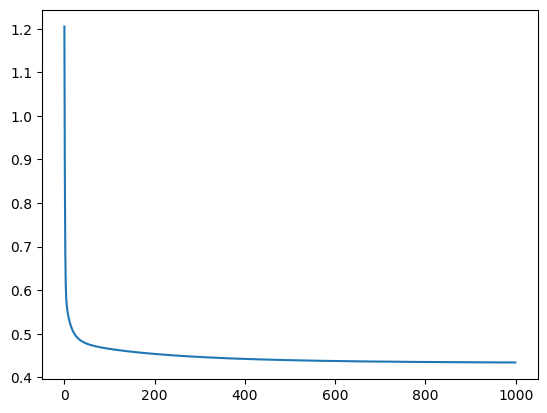

In [15]:
import matplotlib.pyplot as plt
cost=[]
epochs=[]
w=[1]*7
b=0
w_temp=[0]*7
b_temp=0
for i in range(1000):
    pred=np.dot(x_train,w)
    pred=pred+b
    pred=1/(1+np.exp(-pred))
    loss=np.multiply(y_train, np.log(pred))+np.multiply((1-y_train),np.log(1-pred))
    loss=-loss.sum()/668
    error=pred-y_train
    error=error.dot(error)
    error=error/(2*668)
    cost.append(loss)
    epochs.append(i)
    print(loss, error)
    for j in range(7): 
        w_temp[j]=w[j]-0.01/668*np.dot((pred-y_train),(x_train.iloc[:,j]))-0.0/668*w[j]# regularization parameter=1
    b_temp=b-0.01/668*(pred-y_train).sum() 
    w=w_temp
    b=b_temp
plt.plot(epochs, cost)
plt.show()

In [12]:
print('w= ',w)
print('b= ',b)
pred_y=np.dot(x_test, w)
pred_y=pred_y+b
pred_y=1/(1+np.exp(-pred_y))
loss=np.multiply(y_test, np.log(pred_y))+np.multiply((1-y_test),np.log(1-pred_y))
loss=-loss.sum()/223
loss


w=  [-0.3745197498779226, 1.2231069697863992, 0.48179180474376426, 0.8379208971377415, 0.9060167153496729, 1.0035851715550896, 0.6808732823452629]
b=  -1.1948712527201044


0.5207609019818188